In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

In [3]:
train_label = pd.read_csv("Training_set.csv")
test_label=pd.read_csv("Testing_set.csv")

In [4]:
train_label.head()

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART


In [5]:
butterfly_type=list(train_label.label.unique())
butterfly_type

['SOUTHERN DOGFACE',
 'ADONIS',
 'BROWN SIPROETA',
 'MONARCH',
 'GREEN CELLED CATTLEHEART',
 'CAIRNS BIRDWING',
 'EASTERN DAPPLE WHITE',
 'RED POSTMAN',
 'MANGROVE SKIPPER',
 'BLACK HAIRSTREAK',
 'CABBAGE WHITE',
 'RED ADMIRAL',
 'PAINTED LADY',
 'PAPER KITE',
 'SOOTYWING',
 'PINE WHITE',
 'PEACOCK',
 'CHECQUERED SKIPPER',
 'JULIA',
 'COMMON WOOD-NYMPH',
 'BLUE MORPHO',
 'CLOUDED SULPHUR',
 'STRAITED QUEEN',
 'ORANGE OAKLEAF',
 'PURPLISH COPPER',
 'ATALA',
 'IPHICLUS SISTER',
 'DANAID EGGFLY',
 'LARGE MARBLE',
 'PIPEVINE SWALLOW',
 'BLUE SPOTTED CROW',
 'RED CRACKER',
 'QUESTION MARK',
 'CRIMSON PATCH',
 'BANDED PEACOCK',
 'SCARCE SWALLOW',
 'COPPER TAIL',
 'GREAT JAY',
 'INDRA SWALLOW',
 'VICEROY',
 'MALACHITE',
 'APPOLLO',
 'TWO BARRED FLASHER',
 'MOURNING CLOAK',
 'TROPICAL LEAFWING',
 'POPINJAY',
 'ORANGE TIP',
 'GOLD BANDED',
 'BECKERS WHITE',
 'RED SPOTTED PURPLE',
 'MILBERTS TORTOISESHELL',
 'SILVER SPOT SKIPPER',
 'AMERICAN SNOOT',
 'AN 88',
 'ULYSES',
 'COMMON BANDED AWL',
 'C

In [6]:
# import cv2
# from PIL import Image
# import matplotlib.pyplot as plt
# import numpy as np

# # Đường dẫn tới thư mục chứa ảnh
# direct = "D:/ARTIFICIAL_INTELLIGENCE/KỲ 5/Deep_Learning_(DPL302m)/Project/train/"
# img_no = "Image_1.jpg"

# # Đọc ảnh sử dụng OpenCV
# img = cv2.imread(direct + img_no)

# # Chuyển đổi màu từ BGR (OpenCV) sang RGB (Pillow)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# # Chuyển đổi ảnh từ numpy array sang PIL Image
# img = Image.fromarray(img, "RGB")

# # Hiển thị ảnh sử dụng matplotlib
# plt.imshow(np.array(img))
# plt.axis('off') # Tắt hiển thị trục
# plt.show()


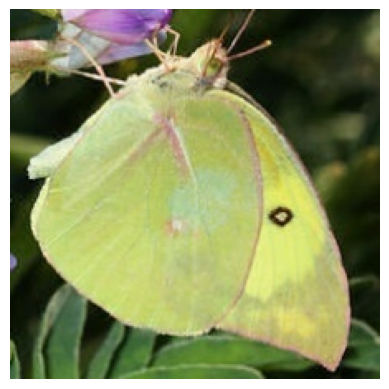

In [7]:
from matplotlib.image import imread
A = imread("/ARTIFICIAL_INTELLIGENCE/KỲ 5/Deep_Learning_(DPL302m)/Project/train/Image_1.jpg")
# For conversion to greyscale image
#X = np.mean(A, -1)
img = plt.imshow(A)
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [8]:
A.shape

(224, 224, 3)

In [9]:
train= "/ARTIFICIAL_INTELLIGENCE/KỲ 5/Deep_Learning_(DPL302m)/Project/train/"
test= "/ARTIFICIAL_INTELLIGENCE/KỲ 5/Deep_Learning_(DPL302m)/Project/test/"

In [10]:
def preprocess(image_directory, image_name, size=128) :
    image = imread(image_directory + image_name)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((size, size))
    return np.array(image)

In [11]:
train_data = []
train_labels = []

In [12]:
for it in butterfly_type :
    data_curr_butterfly = train_label[train_label['label'] == it]
    curr_filenames = list(data_curr_butterfly['filename'])
    curr_labels = list(data_curr_butterfly['label'])
    for itr_no in range(len(curr_filenames)) :
        curr_image = preprocess(image_directory=train, image_name=curr_filenames[itr_no])
        curr_label = curr_labels[itr_no]
        train_data.append(curr_image)
        train_labels.append(butterfly_type.index(curr_label))

In [13]:
train_data=np.array(train_data)
train_labels=np.array(train_labels)

In [14]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
classes=train_labels[0].shape[0]
classes

75

ADONIS


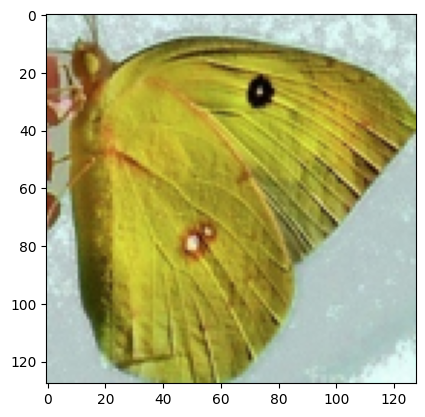

In [15]:
print(butterfly_type[1])#train_labels[2]])
plt.imshow(train_data[1])

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

In [18]:
model=Sequential()
model.add(Conv2D(16,(3,3),input_shape=train_data[0].shape,activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(256,activation="relu"))
# model.add(Dropout(0.2))
model.add(Dense(1024,activation="relu"))
# model.add(Dropout(0.2))
model.add(Dense(classes,activation="softmax")) #75 butterfly classes

In [19]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=["accuracy"])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    14,745,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 75)             │        76,875 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,095,627 (57.59 MB)

 Trainable params: 15,095,627 (57.59 MB)

 Non-trainable params: 0 (0.00 B)

None


In [20]:
history=model.fit(train_data,train_labels,epochs=10,batch_size=150)

Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 16s 404ms/step - accuracy: 0.0203 - loss: 155.0829
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 14s 414ms/step - accuracy: 0.1284 - loss: 3.8831
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 14s 397ms/step - accuracy: 0.4887 - loss: 2.2290
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 14s 402ms/step - accuracy: 0.8014 - loss: 0.8397
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 14s 400ms/step - accuracy: 0.9287 - loss: 0.3161
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 13s 380ms/step - accuracy: 0.9662 - loss: 0.1815
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 13s 387ms/step - accuracy: 0.9829 - loss: 0.0758
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 13s 377ms/step - accuracy: 0.9848 - loss: 0.0628
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 13s 375ms/step - accuracy: 0.9918 - loss: 0.0435
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 13s 378ms/step - accuracy: 0.9884 - loss: 0.0469


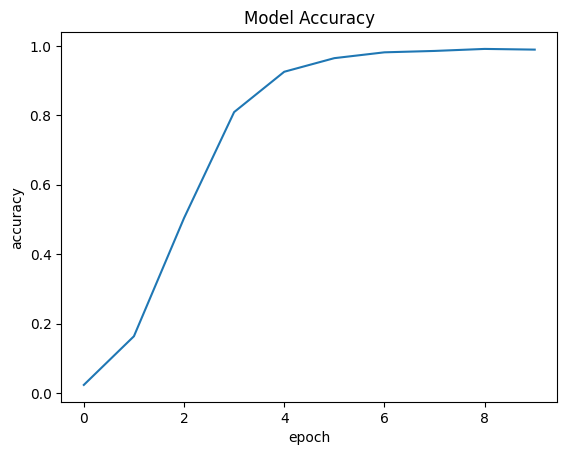

In [21]:
plt.plot(history.history["accuracy"])
plt.title("Model Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()

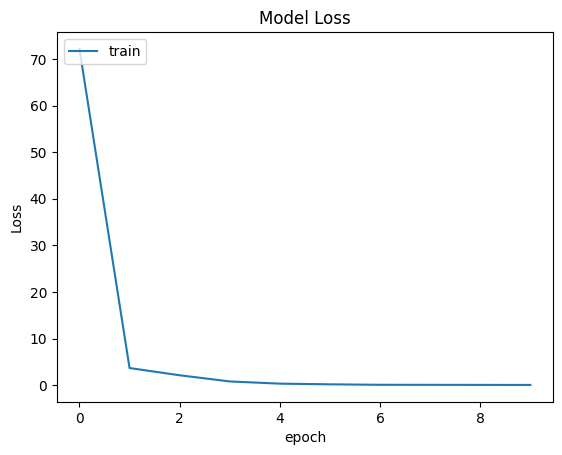

In [22]:
plt.plot(history.history["loss"])
# plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()

In [24]:
result= []
for file_name in list(test_label['ID']) :
    curr_image = preprocess(image_directory=test, image_name=file_name)
    result.append(butterfly_type[np.argmax(model.predict(np.expand_dims(preprocess(image_directory=test, image_name=file_name), axis=0)))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

In [25]:
test_label["label"]=result
test_label.head(10)

,ID,label
0,Image_1.jpg,YELLOW SWALLOW TAIL
1,Image_2.jpg,PEACOCK
2,Image_3.jpg,GREAT JAY
3,Image_4.jpg,RED SPOTTED PURPLE
4,Image_5.jpg,RED SPOTTED PURPLE
5,Image_6.jpg,GREAT JAY
6,Image_7.jpg,COPPER TAIL
7,Image_8.jpg,CAIRNS BIRDWING
8,Image_9.jpg,MONARCH
9,Image_10.jpg,CRIMSON PATCH


In [27]:
# direct="/ARTIFICIAL_INTELLIGENCE/KỲ 5/Deep_Learning_(DPL302m)/Project/test"
# img_no="Image_3.jpg"
# img=cv2.imread(direct+img_no)
# img=Image.fromarray(img,"RGB")
# plt.imshow(np.array(img))
# print(test_label.label[3])

In [29]:
test_label.to_csv("Testing_set_cnn.csv",index=False)